## Model 1: Pre-trained with [***KDDCUP19***](https://www.openml.org/d/1113) Dataset
####Team Member: Avin Vincent
- Using CSV version of the Dataset



> Reference: [Intrusion Detection In Computer Networks Using Machine Learning Algorithms](https://ieeexplore.ieee.org/document/9509554)



In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Mounting Google Drive
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# Loading the dataset
dataset = pd.read_csv('https://drive.google.com/uc?export=download&id=1-UUSGXEByaSoSJg4PT2yrjqYCHc3IHIT',header=None)
df=pd.DataFrame(dataset)
df

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


In [ ]:
# Displaying information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 43 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       22544 non-null  int64  
 1   1       22544 non-null  object 
 2   2       22544 non-null  object 
 3   3       22544 non-null  object 
 4   4       22544 non-null  int64  
 5   5       22544 non-null  int64  
 6   6       22544 non-null  int64  
 7   7       22544 non-null  int64  
 8   8       22544 non-null  int64  
 9   9       22544 non-null  int64  
 10  10      22544 non-null  int64  
 11  11      22544 non-null  int64  
 12  12      22544 non-null  int64  
 13  13      22544 non-null  int64  
 14  14      22544 non-null  int64  
 15  15      22544 non-null  int64  
 16  16      22544 non-null  int64  
 17  17      22544 non-null  int64  
 18  18      22544 non-null  int64  
 19  19      22544 non-null  int64  
 20  20      22544 non-null  int64  
 21  21      22544 non-null  int64  
 22

In [ ]:
# Analyzing the distribution of attacks
p0=dataset[41]
p0.value_counts()

41
normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178
portsweep           157
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
named                17
ps                   15
sendmail             14
rootkit              13
xterm                13
teardrop             12
xlock                 9
land                  7
xsnoop                4
ftp_write             3
worm                  2
loadmodule            2
perl                  2
sqlattack             2
udpstorm              2
phf                   2
imap                  1
Name: count, dtype: int64

<Figure size 640x480 with 0 Axes>

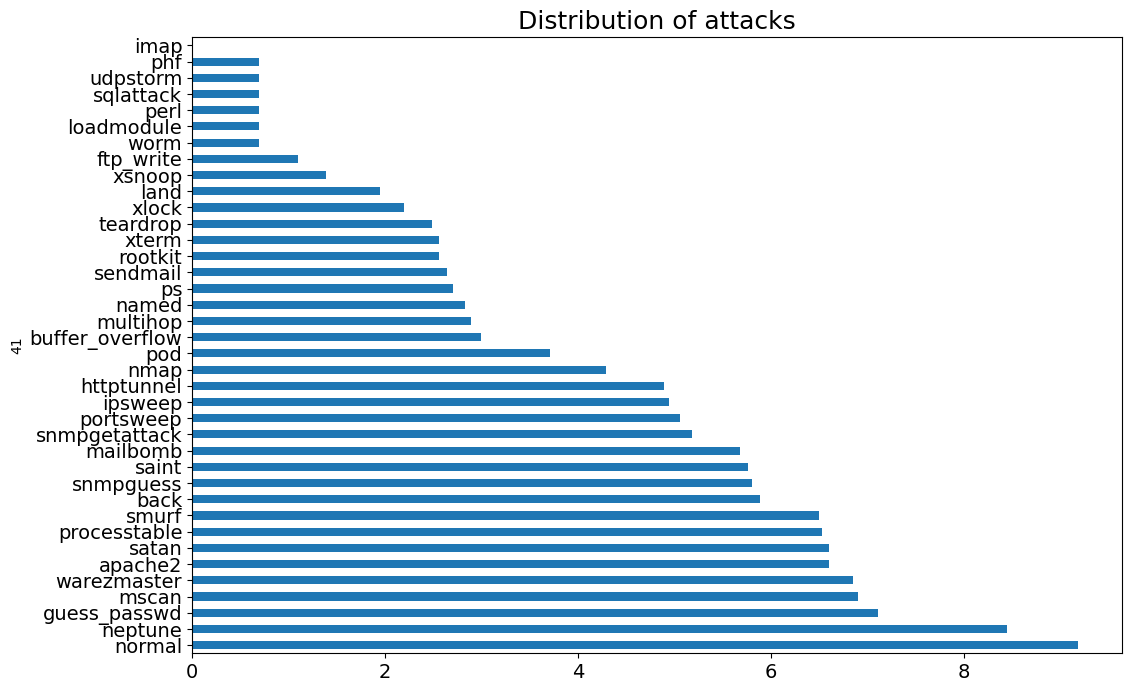

In [ ]:
# Visualizing the distribution of attacks
import matplotlib
import matplotlib.pyplot as plt

plt.clf()
plt.figure(figsize=(12,8))
params = {'axes.titlesize':'18',
          'xtick.labelsize':'14',
          'ytick.labelsize':'14'}
matplotlib.rcParams.update(params)
plt.title('Distribution of attacks')

df[41].value_counts().apply(np.log).plot(kind='barh')

plt.show()

In [ ]:
# Encoding the target variable

from sklearn.preprocessing import LabelEncoder
#preprocessing
number=LabelEncoder()
df[41]=number.fit_transform(df[41].astype('str'))
target=df.iloc[:,41].values
print(target)
#df=df.drop([7,8,9,10,11,13,14,15,16,17,18,19,20,21,22,41,42],axis=1)

[14 14 16 ...  1 16 11]


In [ ]:
# Adding the target variable to the dataframe
df['target']=target
df

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,target
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.06,0.00,0.00,0.00,0.0,1.00,1.00,14,21,14
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.06,0.00,0.00,0.00,0.0,1.00,1.00,14,21,14
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.04,0.61,0.02,0.00,0.0,0.00,0.00,16,21,16
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,0.00,1.00,0.28,0.00,0.0,0.00,0.00,24,15,24
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.17,0.03,0.02,0.00,0.0,0.83,0.71,11,11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.06,0.01,0.01,0.01,0.0,0.00,0.00,16,21,16
22540,0,tcp,http,SF,317,938,0,0,0,0,...,0.00,0.01,0.01,0.01,0.0,0.00,0.00,16,21,16
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,0.00,0.00,0.00,0.00,0.0,0.07,0.07,1,15,1
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.01,0.00,0.00,0.00,0.0,0.00,0.00,16,21,16


In [ ]:
# Encoding categorical features
from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()
df[1]=number.fit_transform(df[1].astype('str'))
target1=df.iloc[:,1].values
print(target1)

[1 1 1 ... 1 2 1]


In [ ]:
from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()
df[2]=number.fit_transform(df[2].astype('str'))
target2=df.iloc[:,2].values
print(target2)

[45 45 19 ... 22 11 52]


In [ ]:
from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()
df[3]=number.fit_transform(df[3].astype('str'))
target3=df.iloc[:,3].values
print(target3)
df=df.drop([1,2,3],axis=1)

[1 1 9 ... 9 9 1]


In [ ]:
# Inserting encoded features back into the dataframe
df.insert(1,'A2pp',target1)
df.insert(2,'A3pp',target2)
df.insert(3,'A4pp',target3)
df

,0,A2pp,A3pp,A4pp,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,target
0,0,1,45,1,0,0,0,0,0,0,...,0.06,0.00,0.00,0.00,0.0,1.00,1.00,14,21,14
1,0,1,45,1,0,0,0,0,0,0,...,0.06,0.00,0.00,0.00,0.0,1.00,1.00,14,21,14
2,2,1,19,9,12983,0,0,0,0,0,...,0.04,0.61,0.02,0.00,0.0,0.00,0.00,16,21,16
3,0,0,13,9,20,0,0,0,0,0,...,0.00,1.00,0.28,0.00,0.0,0.00,0.00,24,15,24
4,1,1,55,2,0,15,0,0,0,0,...,0.17,0.03,0.02,0.00,0.0,0.83,0.71,11,11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,1,49,9,794,333,0,0,0,0,...,0.06,0.01,0.01,0.01,0.0,0.00,0.00,16,21,16
22540,0,1,22,9,317,938,0,0,0,0,...,0.00,0.01,0.01,0.01,0.0,0.00,0.00,16,21,16
22541,0,1,22,9,54540,8314,0,0,0,2,...,0.00,0.00,0.00,0.00,0.0,0.07,0.07,1,15,1
22542,0,2,11,9,42,42,0,0,0,0,...,0.01,0.00,0.00,0.00,0.0,0.00,0.00,16,21,16


In [ ]:
# Extracting the target variable
df_target = df.pop('target')
df_target

0        14
1        14
2        16
3        24
4        11
         ..
22539    16
22540    16
22541     1
22542    16
22543    11
Name: target, Length: 22544, dtype: int64

In [ ]:
# Grouping attack types into broader categories
for i in range(0,len(df_target)):
    if (df_target[i]== 14 or df_target[i]==1 or df_target[i]==27 or df_target[i]==10 or df_target[i]==31 or df_target[i]==0 or df_target[i]==21 or df_target[i]==18 or df_target[i]==8):
        df_target[i]=0
    elif df_target[i]== 16:
        df_target[i]=1
    elif (df_target[i]== 2 or df_target[i]==34 or df_target[i]==30 or df_target[i]==23 or df_target[i]==22 or df_target[i]==37 or df_target[i]==32):
        df_target[i]=4
    elif (df_target[i]== 7 or df_target[i]==15 or df_target[i]==20 or df_target[i]==25 or df_target[i]==11 or df_target[i]==24):
        df_target[i]=2
    else:
        df_target[i]=3
df_target

Streaming output truncated to the last 5000 lines.
<ipython-input-14-8cab6a93a265>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_target[i]=0
<ipython-input-14-8cab6a93a265>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_target[i]=0
<ipython-input-14-8cab6a93a265>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_target[i]=3
<ipython-input-14-8cab6a93a265>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy 

0        0
1        0
2        1
3        2
4        2
        ..
22539    1
22540    1
22541    0
22542    1
22543    2
Name: target, Length: 22544, dtype: int64

In [ ]:
# Adding the grouped target variable back to the dataframe
df['target']=df_target
df

,0,A2pp,A3pp,A4pp,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,target
0,0,1,45,1,0,0,0,0,0,0,...,0.06,0.00,0.00,0.00,0.0,1.00,1.00,14,21,0
1,0,1,45,1,0,0,0,0,0,0,...,0.06,0.00,0.00,0.00,0.0,1.00,1.00,14,21,0
2,2,1,19,9,12983,0,0,0,0,0,...,0.04,0.61,0.02,0.00,0.0,0.00,0.00,16,21,1
3,0,0,13,9,20,0,0,0,0,0,...,0.00,1.00,0.28,0.00,0.0,0.00,0.00,24,15,2
4,1,1,55,2,0,15,0,0,0,0,...,0.17,0.03,0.02,0.00,0.0,0.83,0.71,11,11,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,1,49,9,794,333,0,0,0,0,...,0.06,0.01,0.01,0.01,0.0,0.00,0.00,16,21,1
22540,0,1,22,9,317,938,0,0,0,0,...,0.00,0.01,0.01,0.01,0.0,0.00,0.00,16,21,1
22541,0,1,22,9,54540,8314,0,0,0,2,...,0.00,0.00,0.00,0.00,0.0,0.07,0.07,1,15,0
22542,0,2,11,9,42,42,0,0,0,0,...,0.01,0.00,0.00,0.00,0.0,0.00,0.00,16,21,1


In [ ]:
# Counting the occurrences of each attack category
df['target'].value_counts()

target
1    9711
0    7417
3    2928
2    2421
4      67
Name: count, dtype: int64

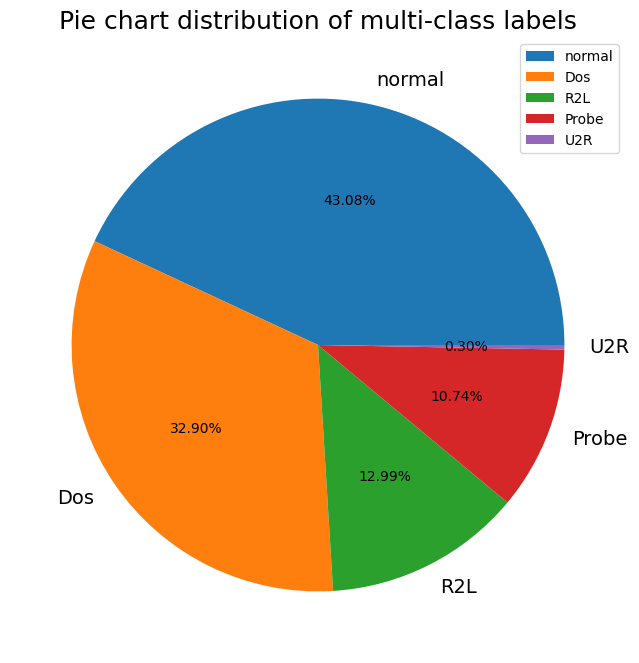

In [ ]:
# Visualizing pie chart distribution of normal and abnormal labels
plt.figure(figsize=(8,8))
plt.pie(df.target.value_counts(),labels=['normal','Dos','R2L','Probe','U2R'],autopct='%0.2f%%')
plt.title('Pie chart distribution of multi-class labels')
plt.legend()
#plt.savefig('plots/Pie_chart_binary.png')
plt.show()

In [ ]:
#############################

## Model 1: Against the Combined Dataset
####Team Member: Avin Vincent

- CSV version of all the pcap datasets of the team

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the dataset
dataset = pd.read_csv('https://drive.google.com/uc?export=download&id=1Egz0nBQyDxWiTeAaYtmO9k2K11Ow0Urf',header=None)
df=pd.DataFrame(dataset)
df

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
1,62015,1261,51885.0,1599,53.0,17.0,181,76978.0,2.0,2.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,58525,1261,16641.0,1599,53.0,17.0,181,78120.0,2.0,2.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,33764,1256,15954.0,1599,53.0,17.0,181,205.0,2.0,2.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,33749,1256,15744.0,1599,53.0,17.0,181,169.0,2.0,2.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7263,10247,1001,443.0,1603,51954.0,6.0,130,3.0,2.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
7264,15216,1263,62108.0,1590,53.0,17.0,130,110225.0,1.0,1.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
7265,89865,4038,0.0,4913,0.0,0.0,130,119994187.0,83.0,0.0,...,0.0,4397194.166999999,7971475.641,19900000.0,65.0,10400000.0,4150499.041,19300000.0,5960934.0,BENIGN
7266,61697,1261,48645.0,1599,53.0,17.0,130,45557.0,2.0,2.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [ ]:
# Displaying information about the dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7268 entries, 0 to 7267
Data columns (total 84 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7268 non-null   object
 1   1       7268 non-null   object
 2   2       7268 non-null   object
 3   3       7268 non-null   object
 4   4       7268 non-null   object
 5   5       7268 non-null   object
 6   6       7268 non-null   object
 7   7       7268 non-null   object
 8   8       7268 non-null   object
 9   9       7268 non-null   object
 10  10      7268 non-null   object
 11  11      7268 non-null   object
 12  12      7268 non-null   object
 13  13      7268 non-null   object
 14  14      7268 non-null   object
 15  15      7268 non-null   object
 16  16      7268 non-null   object
 17  17      7268 non-null   object
 18  18      7268 non-null   object
 19  19      7268 non-null   object
 20  20      7268 non-null   object
 21  21      7268 non-null   object
 22  22      7268 non-null   

In [ ]:
# Analyzing the distribution of attacks

p0=dataset[83]
p0.value_counts()

83
BENIGN                          5087
Web Attack â€“ Brute Force      1507
Web Attack â€“ XSS               652
Web Attack â€“ Sql Injection      21
Label                              1
Name: count, dtype: int64

<Figure size 640x480 with 0 Axes>

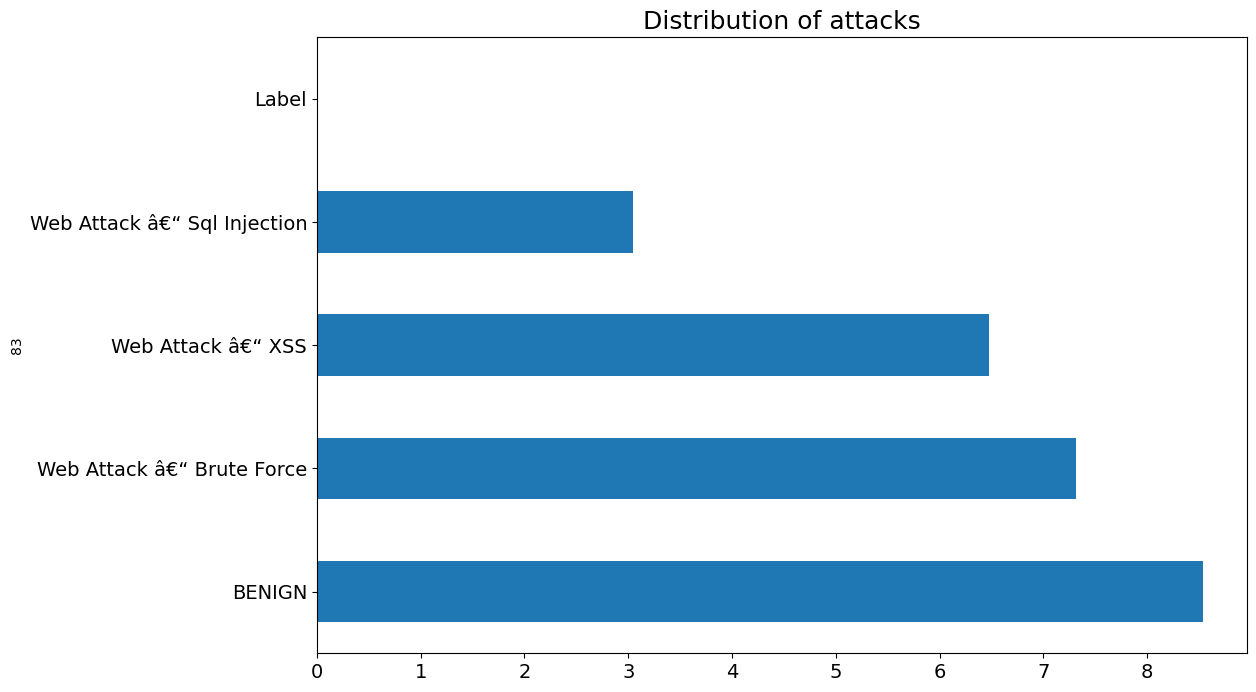

In [ ]:
# Visualizing the distribution of attacks

import matplotlib
import matplotlib.pyplot as plt

plt.clf()
plt.figure(figsize=(12,8))
params = {'axes.titlesize':'18',
          'xtick.labelsize':'14',
          'ytick.labelsize':'14'}
matplotlib.rcParams.update(params)
plt.title('Distribution of attacks')
#df.plot(kind='barh')
df[83].value_counts().apply(np.log).plot(kind='barh')

plt.show()

In [ ]:
########################################################

# Model 2 : Against the Combined Dataset of the team
Team member: Likitha Reddy

- Model is not pre-trained with any specific dataset.
- Model is developed by the team member, but is influenced by the Project [NetForensix](https://github.com/Flanker-shyam/NetForensix) and [Edge-Detect](https://arxiv.org/pdf/2102.01873v1)


In [ ]:
import numpy as np # Importing libraries
import pandas as pd



In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import seaborn as sns
import sklearn
import imblearn
import matplotlib.pyplot as plt
import time
import sklearn.metrics as m

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#Probably can`t be finished because of huge amount of data with google colab hardware, add nrows parameter to run here
#Load Data
df=pd.read_csv("https://drive.google.com/uc?export=download&id=1Egz0nBQyDxWiTeAaYtmO9k2K11Ow0Urf")#,nrows = 50000

from itertools import combinations
import seaborn as sns
import matplotlib.pyplot as plt



df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 84 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Flow ID                      7267 non-null   int64  
 1   Source IP                    7267 non-null   int64  
 2   Source Port                  7267 non-null   float64
 3   Destination IP               7267 non-null   int64  
 4   Destination Port             7267 non-null   float64
 5   Protocol                     7267 non-null   float64
 6   Timestamp                    7267 non-null   int64  
 7   Flow Duration                7267 non-null   float64
 8   Total Fwd Packets            7267 non-null   float64
 9   Total Backward Packets       7267 non-null   float64
 10  Total Length of Fwd Packets  7267 non-null   float64
 11  Total Length of Bwd Packets  7267 non-null   float64
 12  Fwd Packet Length Max        7267 non-null   float64
 13  Fwd Packet Length 

In [ ]:
print("The columns present in the dataset are: ",df.columns)

The columns present in the dataset are:  Index(['Flow ID', 'Source IP', 'Source Port', 'Destination IP',
       'Destination Port', 'Protocol', 'Timestamp', 'Flow Duration',
       'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max

In [ ]:
df.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,62015,1261,51885.0,1599,53.0,17.0,181,76978.0,2.0,2.0,78.0,206.0,39.0,39.0,39.0,0.0,103.0,103.0,103.0,0.0,3.689366e+03,51.962898,25659.333330,44436.340820,76970.0,4.0,4.0,4.0,0.0,4.0,4.0,4.0,4.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,64.0,64.0,25.981449,25.981449,39.0,103.0,64.6,35.054244,1228.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,80.75,39.0,103.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,78.0,2.0,206.0,-1.0,-1.0,1.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,58525,1261,16641.0,1599,53.0,17.0,181,78120.0,2.0,2.0,78.0,206.0,39.0,39.0,39.0,0.0,103.0,103.0,103.0,0.0,3.635433e+03,51.203277,26040.000000,45096.540850,78113.0,3.0,3.0,3.0,0.0,3.0,3.0,4.0,4.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,64.0,64.0,25.601638,25.601638,39.0,103.0,64.6,35.054244,1228.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,80.75,39.0,103.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,78.0,2.0,206.0,-1.0,-1.0,1.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,33764,1256,15954.0,1599,53.0,17.0,181,205.0,2.0,2.0,64.0,158.0,32.0,32.0,32.0,0.0,79.0,79.0,79.0,0.0,1.082927e+06,19512.195120,68.333333,83.530434,163.0,5.0,37.0,37.0,0.0,37.0,37.0,5.0,5.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,64.0,64.0,9756.097561,9756.097561,32.0,79.0,50.8,25.742960,662.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,63.50,32.0,79.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,64.0,2.0,158.0,-1.0,-1.0,1.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,33749,1256,15744.0,1599,53.0,17.0,181,169.0,2.0,2.0,102.0,224.0,51.0,51.0,51.0,0.0,112.0,112.0,112.0,0.0,1.928994e+06,23668.639050,56.333333,91.511384,162.0,3.0,3.0,3.0,0.0,3.0,3.0,4.0,4.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,64.0,40.0,11834.319530,11834.319530,51.0,112.0,75.4,33.411076,1116.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,94.25,51.0,112.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,102.0,2.0,224.0,-1.0,-1.0,1.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,34500,1256,28467.0,1599,53.0,17.0,181,297.0,2.0,2.0,102.0,224.0,51.0,51.0,51.0,0.0,112.0,112.0,112.0,0.0,1.097643e+06,13468.013470,99.000000,90.415707,184.0,4.0,4.0,4.0,0.0,4.0,4.0,184.0,184.0,0.0,184.0,184.0,0.0,0.0,0.0,0.0,64.0,64.0,6734.006734,6734.006734,51.0,112.0,75.4,33.411076,1116.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,94.25,51.0,112.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,102.0,2.0,224.0,-1.0,-1.0,1.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [ ]:
df.describe()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7.267000e+03,7267.000000,7267.000000,7267.000000,7.267000e+03,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7.267000e+03,7.267000e+03,7.267000e+03,7.267000e+03,7.267000e+03,7.267000e+03,7.267000e+03,7.267000e+03,7.267000e+03,7.267000e+03,7.267000e+03,7.267000e+03,7.267000e+03,7.267000e+03,7.267000e+03,7.267000e+03,7267.000000,7267.0,7267.0,7267.0,7267.000000,7267.000000,7.267000e+03,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7.267000e+03,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.0,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.0,7267.0,7267.0,7267.0,7267.0,7267.0,7267.000000,7267.000000,7267.000000,7.267000e+03,7267.000000,7267.000000,7267.000000,7267.000000,7.267000e+03,7.267000e+03,7.267000e+03,7.267000e+03,7.267000e+03,7.267000e+03,7.267000e+03,7.267000e+03
mean,27653.189212,1204.670290,42830.419155,1831.772121,5779.689693,9.733315,134.704280,1.022024e+07,9.182882,8.108298,946.850833,8.801540e+03,134.738819,16.373331,39.074288,39.554590,318.406495,37.423834,129.073787,99.222468,1.144284e+06,4.073909e+04,1.130930e+06,1.881990e+06,4.383690e+06,1.189900e+05,9.988001e+06,2.088626e+06,1.727207e+06,4.282282e+06,9.055753e+05,8.029001e+06,1.346369e+06,5.742710e+05,2.460268e+06,9.081867e+05,0.031650,0.0,0.0,0.0,253.848356,211.828815,3.618087e+04,4558.218430,15.575616,345.056557,79.604979,101.535819,5.864708e+04,0.009357,0.031650,0.000413,0.435943,0.216733,0.098528,0.0,0.000413,0.506124,89.950814,39.074288,129.073787,0.0,0.0,0.0,0.0,0.0,0.0,9.182882,946.850833,8.108298,8.790145e+03,12398.905188,8745.440622,5.045824,27.422595,5.498477e+04,3.038243e+04,1.119693e+05,3.925752e+04,2.475254e+06,8.708279e+04,2.535257e+06,2.380353e+06
std,27279.926011,499.069154,20680.019914,874.466190,16011.940093,5.212933,83.988227,2.638671e+07,79.655021,118.647957,6313.089968,2.050247e+05,446.074188,36.756911,92.273507,125.055049,753.826642,61.472710,266.529912,252.768653,2.680836e+07,1.937792e+05,3.791247e+06,4.939126e+06,1.127606e+07,2.631117e+06,2.630658e+07,8.290071e+06,3.027827e+06,1.126861e+07,8.178452e+06,2.579847e+07,8.242674e+06,2.405741e+06,1.063602e+07,8.115153e+06,0.175078,0.0,0.0,0.0,1762.843080,2424.232892,1.902487e+05,25113.696907,22.414443,831.817469,154.133446,219.873163,2.211097e+05,0.096286,0.175078,0.020315,0.495914,0.412048,0.298047,0.0,0.020315,0.521553,159.476079,92.273507,266.529912,0.0,0.0,0.0,0.0,0.0,0.0,79.655021,6313.089968,118.647957,2.043706e+05,15619.416666,13971.420904,74.275710,6.111466,5.66691

In [ ]:
df['Label'].nunique()

4

In [ ]:
#DATA Cleansing

def data_cleaning(df):
    df.columns=df.columns.str.strip()
    print("Dataset Shape: ",df.shape)

    num=df._get_numeric_data()
    num[num<0]=0

    zero_variance_cols=[]
    for col in df.columns:
        if len(df[col].unique()) == 1:
            zero_variance_cols.append(col)
    df.drop(columns=zero_variance_cols,axis=1,inplace=True)
    print("Zero Variance Columns: ",zero_variance_cols, " are dropped!!")
    print("Shape after removing the zero variance columns: ",df.shape)

    df.replace([np.inf,-np.inf],np.nan,inplace=True)
    print(df.isna().any(axis=1).sum(), "rows dropped")
    df.dropna(inplace=True)
    print("Shape after Removing NaN: ",df.shape)

    df.drop_duplicates(inplace=True)
    print("Shape after dropping duplicates: ",df.shape)

    column_pairs = [(i,j) for i,j in combinations(df,2) if df[i].equals(df[j])]
    ide_cols=[]
    for col_pair in column_pairs:
        ide_cols.append(col_pair[1])
    df.drop(columns=ide_cols,axis=1,inplace=True)
    print("Columns which have identical values: ",column_pairs," dropped!")
    print("Shape after removing identical value columns: ",df.shape)
    return df
df=data_cleaning(df)



Dataset Shape:  (7267, 84)
Zero Variance Columns:  ['Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'CWE Flag Count', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']  are dropped!!
Shape after removing the zero variance columns:  (7267, 74)
0 rows dropped
Shape after Removing NaN:  (7267, 74)
Shape after dropping duplicates:  (7267, 74)
Columns which have identical values:  [('Total Fwd Packets', 'Subflow Fwd Packets'), ('Total Backward Packets', 'Subflow Bwd Packets'), ('Total Length of Fwd Packets', 'Subflow Fwd Bytes'), ('Fwd Packet Length Mean', 'Avg Fwd Segment Size'), ('Bwd Packet Length Mean', 'Avg Bwd Segment Size'), ('Fwd PSH Flags', 'SYN Flag Count'), ('RST Flag Count', 'ECE Flag Count')]  dropped!
Shape after removing identical value columns:  (7267, 67)


In [ ]:
df['Label'].value_counts()

Label
BENIGN                          5087
Web Attack â€“ Brute Force      1507
Web Attack â€“ XSS               652
Web Attack â€“ Sql Injection      21
Name: count, dtype: int64

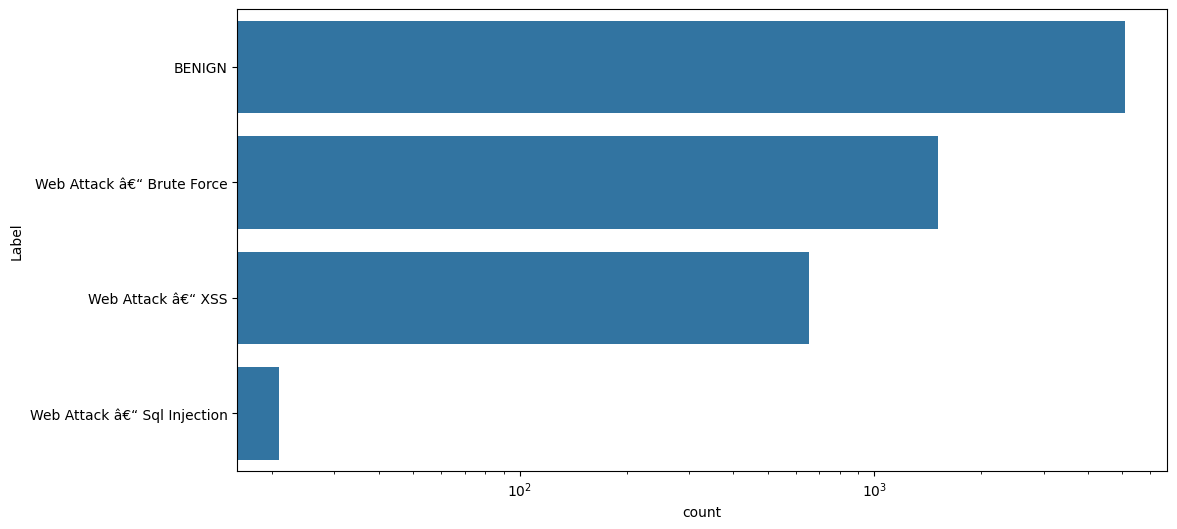

In [ ]:
#Plotting graph
plt.figure(figsize=(12,6))
# Pass the entire DataFrame to the 'data' parameter, and specify the column for counting with 'x' or 'y'
plot=sns.countplot(data=df, y='Label')
plt.xscale('log')
fig=plot.get_figure()
fig.savefig('img1.png')

In [ ]:
#Accuracy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

target = df['Label']
features = df.drop(['Label'], axis =1)

# Split data into training and testing sets using 80/20 ratio
trainX, testX, trainY, testY = train_test_split(features, target, test_size=.30, random_state=30)

model = RandomForestClassifier(max_depth=None,min_samples_leaf=1,min_samples_split=2,n_estimators=150)

model.fit(trainX, trainY)
predictions = model.predict(testX)

score = accuracy_score(testY,predictions)

score

0.9981659789087575

# Model 2 : Against [***KDDCUP19***](https://www.openml.org/d/1113) Dataset
Team member: Likitha Reddy

- Model is not pre-trained with any specific dataset.
- Model is developed by the team member, but is influenced by the Project [NetForensix](https://github.com/Flanker-shyam/NetForensix) and [Edge-Detect](https://arxiv.org/pdf/2102.01873v1)


In [ ]:
import numpy as np # Importing libraries
import pandas as pd



In [ ]:
import numpy as np
import pandas as pd # data processing, CSV file I/O
import matplotlib
import seaborn as sns
import sklearn
import imblearn
import matplotlib.pyplot as plt
import time
import sklearn.metrics as m

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#Probably can`t be finished because of huge amount of data with Google colab hardware, add nrows parameter to run here
#Load Data
df=pd.read_csv("https://drive.google.com/uc?export=download&id=1-UUSGXEByaSoSJg4PT2yrjqYCHc3IHIT", header=None)#,nrows = 50000

from itertools import combinations
import seaborn as sns
import matplotlib.pyplot as plt



df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 43 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       22544 non-null  int64  
 1   1       22544 non-null  object 
 2   2       22544 non-null  object 
 3   3       22544 non-null  object 
 4   4       22544 non-null  int64  
 5   5       22544 non-null  int64  
 6   6       22544 non-null  int64  
 7   7       22544 non-null  int64  
 8   8       22544 non-null  int64  
 9   9       22544 non-null  int64  
 10  10      22544 non-null  int64  
 11  11      22544 non-null  int64  
 12  12      22544 non-null  int64  
 13  13      22544 non-null  int64  
 14  14      22544 non-null  int64  
 15  15      22544 non-null  int64  
 16  16      22544 non-null  int64  
 17  17      22544 non-null  int64  
 18  18      22544 non-null  int64  
 19  19      22544 non-null  int64  
 20  20      22544 non-null  int64  
 21  21      22544 non-null  int64  
 22

In [ ]:
print("The columns present in the dataset are: ",df.columns)

The columns present in the dataset are:  Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42],
      dtype='int64')


In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [ ]:
df.describe()

,0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,42
count,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.0,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039545e+04,2.056019e+03,0.000311,0.008428,0.000710,0.105394,0.021647,0.442202,0.119899,0.002440,0.000266,0.114665,0.008738,0.001153,0.003549,0.0,0.000488,0.028433,79.028345,31.124379,0.102924,0.103635,0.238463,0.235179,0.740345,0.094074,0.098110,193.869411,140.750532,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683,18.017965
std,1407.176612,4.727864e+05,2.121930e+04,0.017619,0.142599,0.036473,0.928428,0.150328,0.496659,7.269597,0.049334,0.021060,8.041614,0.676842,0.048014,0.067829,0.0,0.022084,0.166211,128.539248,89.062532,0.295367,0.298332,0.416118,0.416215,0.412496,0.259138,0.253545,94.035663,111.783972,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875,4.270361
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,121.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,8.000000,6.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,123.250000,16.000000,0.000000,0.000000,0.250000,0.072500,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000,21.000000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,1.000000,2.000000,878.000000,100.000000,5.000000,4.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [ ]:
df[41].nunique()
# Access the 42nd column (index 41) and count unique values

38

In [ ]:
#DATA Cleansing
def data_cleaning(df):
    df.columns = df.columns.astype(str).str.strip()
    print("Dataset Shape: ",df.shape)

    num=df._get_numeric_data()
    num[num<0]=0

    zero_variance_cols=[]
    for col in df.columns:
        if len(df[col].unique()) == 1:
            zero_variance_cols.append(col)
    df.drop(columns=zero_variance_cols,axis=1,inplace=True)
    print("Zero Variance Columns: ",zero_variance_cols, " are dropped!!")
    print("Shape after removing the zero variance columns: ",df.shape)

    df.replace([np.inf,-np.inf],np.nan,inplace=True)
    print(df.isna().any(axis=1).sum(), "rows dropped")
    df.dropna(inplace=True)
    print("Shape after Removing NaN: ",df.shape)

    df.drop_duplicates(inplace=True)
    print("Shape after dropping duplicates: ",df.shape)

    column_pairs = [(i,j) for i,j in combinations(df,2) if df[i].equals(df[j])]
    ide_cols=[]
    for col_pair in column_pairs:
        ide_cols.append(col_pair[1])
    df.drop(columns=ide_cols,axis=1,inplace=True)
    print("Columns which have identical values: ",column_pairs," dropped!")
    print("Shape after removing identical value columns: ",df.shape)
    return df
df=data_cleaning(df)




Dataset Shape:  (22544, 43)
Zero Variance Columns:  ['19']  are dropped!!
Shape after removing the zero variance columns:  (22544, 42)
0 rows dropped
Shape after Removing NaN:  (22544, 42)
Shape after dropping duplicates:  (22544, 42)
Columns which have identical values:  []  dropped!
Shape after removing identical value columns:  (22544, 42)


In [ ]:
df['41'].value_counts()

# Assuming you want the 41st column (index 40 after potential column removals)

# To verify the available columns and their indices, you can print them:
#print(df.columns)

41
normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178
portsweep           157
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
named                17
ps                   15
sendmail             14
rootkit              13
xterm                13
teardrop             12
xlock                 9
land                  7
xsnoop                4
ftp_write             3
worm                  2
loadmodule            2
perl                  2
sqlattack             2
udpstorm              2
phf                   2
imap                  1
Name: count, dtype: int64

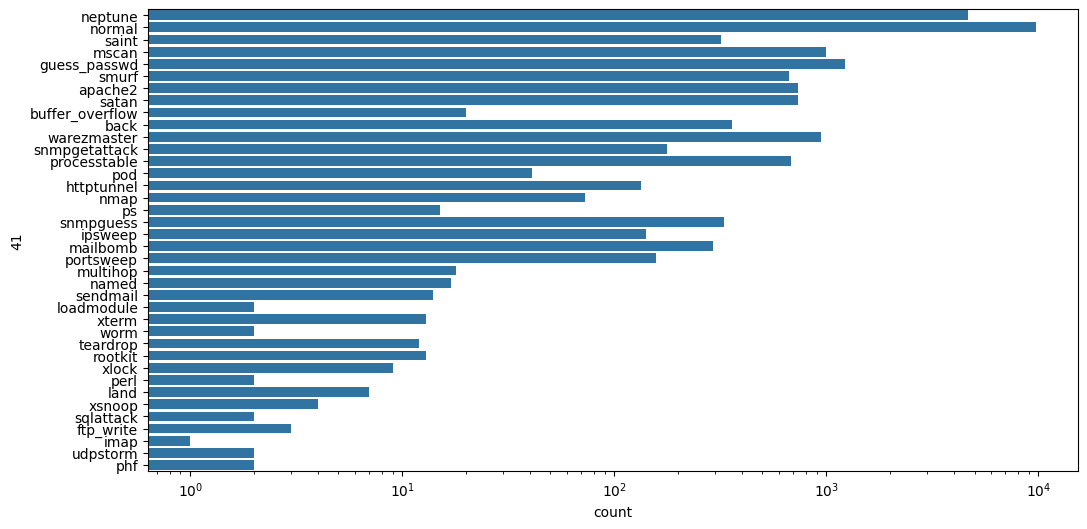

In [ ]:
plt.figure(figsize=(12,6))
# Pass the entire DataFrame to the 'data' parameter, and specify the column for counting with 'x' or 'y'
plot=sns.countplot(data=df, y='41')
plt.xscale('log')
fig=plot.get_figure()
fig.savefig('img1.png')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

target = df['41']
features = df.drop(['41'], axis =1)

# Convert string features to numerical using LabelEncoder
label_encoder = LabelEncoder()
for col in features.columns:
    if features[col].dtype == 'object':  # Check if column is of object (string) type
        features[col] = label_encoder.fit_transform(features[col])

# Split data into training and testing sets using 80/20 ratio
trainX, testX, trainY, testY = train_test_split(features, target, test_size=.30, random_state=30)

model = RandomForestClassifier(max_depth=None,min_samples_leaf=1,min_samples_split=2,n_estimators=150)

model.fit(trainX, trainY)
predictions = model.predict(testX)

score = accuracy_score(testY,predictions)

print("Accuracy = ",score)

0.9897989355411

------------------------------------------------------------


# Model-3
# Team Member: Bharathiselvan Rajendran

PAPER: Synthesis of a Machine Learning Model for Detecting Computer
Attacks Based on the CICIDS2017 Dataset.
https://www.researchgate.net/publication/347631637_Synthesis_of_a_Machine_Learning_Model_for_Detecting_Computer_Attacks_Based_on_the_CICIDS2017_Dataset

DATASET : CICIDS2017, has the attacks SQL Injection, XSS, Bruteforce.

paperwithcode : https://paperswithcode.com/paper/synthesis-of-a-machine-learning-model-for

Git repository : https://github.com/fisher85/ml-cybersecurity/blob/master/python-web-attack-detection/web-attack-detection.ipynb

The dataset uses files from googledrive for smooth collborative purposes therefore readind the csv files could take a moment.

In [ ]:
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install matplotlib

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import time
import pickle
import warnings
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
warnings.filterwarnings("ignore")

# Loading the pre-trained model.

In [6]:
with open('model_3.pkl', 'rb') as f:
    rfc = pickle.load(f)
rfc

RandomForestClassifier(max_depth=17, max_features=10, min_samples_leaf=3,
                       n_estimators=50, oob_score=True, random_state=42)

# Testing the dataset from the paper

In [7]:
df = pd.read_csv("https://drive.google.com/uc?export=download&id=1IUT9y4JKItAxIaPgtToFWJ2Gi3XFf3AK")


In [9]:
df['Label'].value_counts()

Label
BENIGN                        5087
Web Attack – Brute Force      1507
Web Attack – XSS               652
Web Attack – Sql Injection      21
Name: count, dtype: int64

<Axes: ylabel='count'>

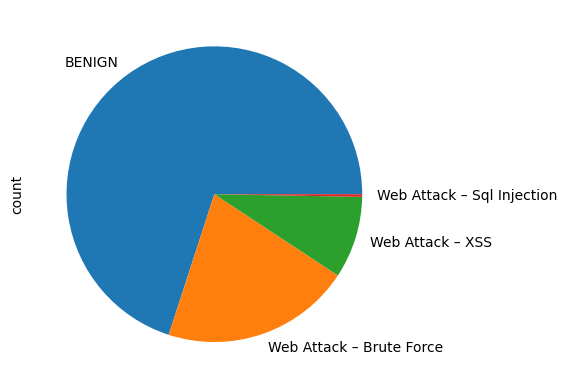

In [10]:
df['Label'].value_counts().plot(kind="pie")

Types of attack in the dataset - SQL Injection, XSS, Bruteforce.

attack features required for the model

In [ ]:
webattack_features   = [ 'Average Packet Size',
 'Flow Bytes/s',
 'Max Packet Length',
 'Fwd Packet Length Mean',
 'Fwd IAT Min',
 'Total Length of Fwd Packets',
 'Flow IAT Mean',
 'Fwd Packet Length Max',
 'Fwd IAT Std',
 'Fwd Header Length']

preparing test dataframe to calculate the metrics

In [ ]:
df['Label'] = df['Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)
y_test = df['Label'].values
X_test = df[webattack_features]
print(X_test.shape, y_test.shape)

(7267, 10) (7267,)


In [ ]:
X_test.head()

,Average Packet Size,Flow Bytes/s,Max Packet Length,Fwd Packet Length Mean,Fwd IAT Min,Total Length of Fwd Packets,Flow IAT Mean,Fwd Packet Length Max,Fwd IAT Std,Fwd Header Length
0,80.75,3.689366e+03,103.0,39.0,4.0,78.0,25659.333330,39.0,0.0,64.0
1,80.75,3.635433e+03,103.0,39.0,3.0,78.0,26040.000000,39.0,0.0,64.0
2,63.50,1.082927e+06,79.0,32.0,37.0,64.0,68.333333,32.0,0.0,64.0
3,94.25,1.928994e+06,112.0,51.0,3.0,102.0,56.333333,51.0,0.0,64.0
4,94.25,1.097643e+06,112.0,51.0,4.0,102.0,99.000000,51.0,0.0,64.0


Testing the dataset

In [ ]:
seconds = time.time()
y_pred = rfc.predict(X_test)
print("Total operation time:", time.time() - seconds, "seconds")

print("Benign records detected (0), attacks detected (1):")
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

Total operation time: 0.016260862350463867 seconds
Benign records detected (0), attacks detected (1):


{0: 5102, 1: 2165}

Attacks detected = 2165, Benign = 5102

Results of the test

In [ ]:
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
print('Accuracy =', accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 =', f1)

Accuracy = 0.9861015549745424
Precision = 0.9801385681293302
Recall = 0.9733944954128441
F1 = 0.9767548906789413


In [ ]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
print("True negative",TN)
print("False negative",FN)
print("True Positive",TP)
print("False Positives",FP)

True negative 5044
False negative 58
True Positive 2122
False Positives 43


# PCAP to CSV
teammates pacps are converted to csv files by usding the tool provided by CICIDS2017 cicflowmeter.

The commands are.
pip install cicflowmeter
cicflowmeter -f "Insert the pcap file here" -c "Insert the csv here"

The model was able to succesfully detect anomalies with good metrics

# Model-3 against Teammate - 1 dataset

In [ ]:
df1 = pd.read_csv("https://drive.google.com/uc?export=download&id=1nRxP_hvrtzs94p7Bz6eYWOZdcZhI5eLb")

In [ ]:
df2 = pd.read_csv("https://drive.google.com/uc?export=download&id=1EStb5eYxbzyI2EiC3sIZYhu-OnzlPWsj")

Types of attack in the dataset portscan, ddos, Command and Control attacks.

Data labeling for model_3

In [ ]:
attack_features_1 = ['pkt_size_avg','flow_byts_s','pkt_len_max','fwd_pkt_len_mean','fwd_iat_min','totlen_fwd_pkts','flow_iat_mean','fwd_pkt_len_max','fwd_iat_std','fwd_header_len']

In [ ]:
df1 = df1[attack_features_1]
df2 = df2[attack_features_1]

Renaming colums

In [ ]:
df1.rename(columns={'pkt_size_avg':'Average Packet Size','flow_byts_s':'Flow Bytes/s','pkt_len_max':'Max Packet Length','fwd_pkt_len_mean':'Fwd Packet Length Mean','fwd_iat_min':'Fwd IAT Min','totlen_fwd_pkts':'Total Length of Fwd Packets','flow_iat_mean':'Flow IAT Mean','fwd_pkt_len_max':'Fwd Packet Length Max','fwd_iat_std':'Fwd IAT Std','fwd_header_len':'Fwd Header Length'}, inplace=True)
df2.rename(columns={'pkt_size_avg':'Average Packet Size','flow_byts_s':'Flow Bytes/s','pkt_len_max':'Max Packet Length','fwd_pkt_len_mean':'Fwd Packet Length Mean','fwd_iat_min':'Fwd IAT Min','totlen_fwd_pkts':'Total Length of Fwd Packets','flow_iat_mean':'Flow IAT Mean','fwd_pkt_len_max':'Fwd Packet Length Max','fwd_iat_std':'Fwd IAT Std','fwd_header_len':'Fwd Header Length'}, inplace=True)

In [ ]:
result = df1
result = pd.concat([result,df2], ignore_index= False)

In [ ]:
result = result.reset_index(drop=False)

In [ ]:
attack_features = [ 'Average Packet Size',
 'Flow Bytes/s',
 'Max Packet Length',
 'Fwd Packet Length Mean',
 'Fwd IAT Min',
 'Total Length of Fwd Packets',
 'Flow IAT Mean',
 'Fwd Packet Length Max',
 'Fwd IAT Std',
 'Fwd Header Length']

In [ ]:
result = result[attack_features]

In [ ]:
result.head()

,Average Packet Size,Flow Bytes/s,Max Packet Length,Fwd Packet Length Mean,Fwd IAT Min,Total Length of Fwd Packets,Flow IAT Mean,Fwd Packet Length Max,Fwd IAT Std,Fwd Header Length
0,90.000000,3.333333,90,90.000000,66000117.0,270,3.375001e+07,90,1.499895e+06,24
1,117.933610,159.645905,298,66.644068,3.0,7864,7.417979e+05,106,3.025349e+06,2360
2,768.168367,4492.595636,2962,72.838384,249.0,7211,1.718623e+05,215,1.901074e+06,1980
3,764.854922,17238.888649,2962,73.383838,250.0,7265,4.459908e+04,217,4.673121e+05,1980
4,762.488722,98400.820500,2962,75.910448,248.0,5086,7.807508e+03,214,1.754675e+04,1340


# Testing

In [ ]:
import time
seconds = time.time()
y_pred = rfc.predict(result)
print("Total operation time:", time.time() - seconds, "seconds")

print("Benign records detected (0), attacks detected (1):")
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

Total operation time: 0.026043176651000977 seconds
Benign records detected (0), attacks detected (1):


{0: 7876}

# Results

percentage of attacks in the dataset = 91% i.e 7221
Attacks detected = 0
Attacks detected is positive class and not detecting benigns is negative class.
therefore,
true positive = 0
true negative = 655
false positive = 0
false negative = 7221

Precision and F1 score are left from the calculation because those are divided by zero.

In [ ]:
TP = 0
TN = 655
FP = 0
FN = 7221

In [ ]:
Accuracy = TP + TN / (TP + FP + FN + TN)
Recall = TP / (TP + FN)

In [ ]:
print(Accuracy)
print(Recall)

0.08316404266124937
0.0


# Conclusion

This model is not fit to detect portscan, ddos, Command and Control attacks

# Model-3 against Teammate 2 dataset

In [ ]:
df1 = pd.read_csv("https://drive.google.com/uc?export=download&id=19hFQbMR08XSRekhvssZkWSpmP-TG1OMc")

In [ ]:
df2 = pd.read_csv("https://drive.google.com/uc?export=download&id=1ABfvncLAWnUluEwRRiBa9-wXQryfN7n5")

In [ ]:
df3 = pd.read_csv("https://drive.google.com/uc?export=download&id=1-4kVZQlYOUgIlEep-AWQn7bSB9wPIxLh")

In [ ]:
df4 = pd.read_csv("https://drive.google.com/uc?export=download&id=1rUo1hTOC9h1mm4b3fxifHVLIgfWz20e4")

In [ ]:
df5 = pd.read_csv("https://drive.google.com/uc?export=download&id=12Q8SPDa8FlabRhbxI8WPi-lyPIk2dLwx")

In [ ]:
df6 = pd.read_csv("https://drive.google.com/uc?export=download&id=1StZv7u6GaZQAdg62yUH_hy19IV8L6j1G")

In [ ]:
df7 = pd.read_csv("https://drive.google.com/uc?export=download&id=10uMbdvHdIhln38zsuG5FnmOuKB_4a7dV")

Types of attack in the dataset.
ARP_Spoofing, MQTT-DoS-Connect_Flood, Recon-OS_Scan, Recon-Ping_Sweep, Recon-Port_Scan, Recon-VulScan

In [ ]:
attack_features_1 = ['pkt_size_avg','flow_byts_s','pkt_len_max','fwd_pkt_len_mean','fwd_iat_min','totlen_fwd_pkts','flow_iat_mean','fwd_pkt_len_max','fwd_iat_std','fwd_header_len']


In [ ]:
df1 = df1[attack_features_1]
df2 = df2[attack_features_1]
df3 = df3[attack_features_1]
df4 = df4[attack_features_1]
df5 = df5[attack_features_1]
df6 = df6[attack_features_1]
df7 = df7[attack_features_1]

The column names are changed to adhere to support the model.

In [ ]:
df1.rename(columns={'pkt_size_avg':'Average Packet Size','flow_byts_s':'Flow Bytes/s','pkt_len_max':'Max Packet Length','fwd_pkt_len_mean':'Fwd Packet Length Mean','fwd_iat_min':'Fwd IAT Min','totlen_fwd_pkts':'Total Length of Fwd Packets','flow_iat_mean':'Flow IAT Mean','fwd_pkt_len_max':'Fwd Packet Length Max','fwd_iat_std':'Fwd IAT Std','fwd_header_len':'Fwd Header Length'}, inplace=True)
df2.rename(columns={'pkt_size_avg':'Average Packet Size','flow_byts_s':'Flow Bytes/s','pkt_len_max':'Max Packet Length','fwd_pkt_len_mean':'Fwd Packet Length Mean','fwd_iat_min':'Fwd IAT Min','totlen_fwd_pkts':'Total Length of Fwd Packets','flow_iat_mean':'Flow IAT Mean','fwd_pkt_len_max':'Fwd Packet Length Max','fwd_iat_std':'Fwd IAT Std','fwd_header_len':'Fwd Header Length'}, inplace=True)
df3.rename(columns={'pkt_size_avg':'Average Packet Size','flow_byts_s':'Flow Bytes/s','pkt_len_max':'Max Packet Length','fwd_pkt_len_mean':'Fwd Packet Length Mean','fwd_iat_min':'Fwd IAT Min','totlen_fwd_pkts':'Total Length of Fwd Packets','flow_iat_mean':'Flow IAT Mean','fwd_pkt_len_max':'Fwd Packet Length Max','fwd_iat_std':'Fwd IAT Std','fwd_header_len':'Fwd Header Length'}, inplace=True)
df4.rename(columns={'pkt_size_avg':'Average Packet Size','flow_byts_s':'Flow Bytes/s','pkt_len_max':'Max Packet Length','fwd_pkt_len_mean':'Fwd Packet Length Mean','fwd_iat_min':'Fwd IAT Min','totlen_fwd_pkts':'Total Length of Fwd Packets','flow_iat_mean':'Flow IAT Mean','fwd_pkt_len_max':'Fwd Packet Length Max','fwd_iat_std':'Fwd IAT Std','fwd_header_len':'Fwd Header Length'}, inplace=True)
df5.rename(columns={'pkt_size_avg':'Average Packet Size','flow_byts_s':'Flow Bytes/s','pkt_len_max':'Max Packet Length','fwd_pkt_len_mean':'Fwd Packet Length Mean','fwd_iat_min':'Fwd IAT Min','totlen_fwd_pkts':'Total Length of Fwd Packets','flow_iat_mean':'Flow IAT Mean','fwd_pkt_len_max':'Fwd Packet Length Max','fwd_iat_std':'Fwd IAT Std','fwd_header_len':'Fwd Header Length'}, inplace=True)
df6.rename(columns={'pkt_size_avg':'Average Packet Size','flow_byts_s':'Flow Bytes/s','pkt_len_max':'Max Packet Length','fwd_pkt_len_mean':'Fwd Packet Length Mean','fwd_iat_min':'Fwd IAT Min','totlen_fwd_pkts':'Total Length of Fwd Packets','flow_iat_mean':'Flow IAT Mean','fwd_pkt_len_max':'Fwd Packet Length Max','fwd_iat_std':'Fwd IAT Std','fwd_header_len':'Fwd Header Length'}, inplace=True)
df7.rename(columns={'pkt_size_avg':'Average Packet Size','flow_byts_s':'Flow Bytes/s','pkt_len_max':'Max Packet Length','fwd_pkt_len_mean':'Fwd Packet Length Mean','fwd_iat_min':'Fwd IAT Min','totlen_fwd_pkts':'Total Length of Fwd Packets','flow_iat_mean':'Flow IAT Mean','fwd_pkt_len_max':'Fwd Packet Length Max','fwd_iat_std':'Fwd IAT Std','fwd_header_len':'Fwd Header Length'}, inplace=True)

In [ ]:
result = df1
result = pd.concat([result,df2], ignore_index= False)
result = pd.concat([result,df3], ignore_index= False)
result = pd.concat([result,df4], ignore_index= False)
result = pd.concat([result,df5], ignore_index= False)
result = pd.concat([result,df6], ignore_index= False)
result = pd.concat([result,df7], ignore_index= False)

In [ ]:
result = result.reset_index(drop=False)

In [ ]:
attack_features = [ 'Average Packet Size',
 'Flow Bytes/s',
 'Max Packet Length',
 'Fwd Packet Length Mean',
 'Fwd IAT Min',
 'Total Length of Fwd Packets',
 'Flow IAT Mean',
 'Fwd Packet Length Max',
 'Fwd IAT Std',
 'Fwd Header Length']

In [ ]:
result.head()

,index,Average Packet Size,Flow Bytes/s,Max Packet Length,Fwd Packet Length Mean,Fwd IAT Min,Total Length of Fwd Packets,Flow IAT Mean,Fwd Packet Length Max,Fwd IAT Std,Fwd Header Length
0,0,608.739947,64826.700481,1414,687.642146,0.0,6356564,9391.148079,1414,14706.786817,73952
1,1,74.762136,153.993835,86,83.485437,1653.0,8599,487856.082927,86,138317.401617,2060
2,2,75.354369,155.213426,87,84.669903,1933.0,8721,487856.965854,87,138338.101099,2060
3,3,74.786408,154.041356,86,83.533981,1742.0,8604,487863.917073,86,138411.462144,2060
4,4,75.354369,155.211899,87,84.669903,2534.0,8721,487861.765854,87,138289.194657,2060


In [ ]:
result = result[attack_features]

# Testing

In [ ]:
import time
seconds = time.time()
y_pred = rfc.predict(result)
print("Total operation time:", time.time() - seconds, "seconds")

print("Benign records detected (0), attacks detected (1):")
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

Total operation time: 0.17954492568969727 seconds
Benign records detected (0), attacks detected (1):


{0: 205624, 1: 3}

# Results
percentage of attacks in the dataset = 100% i.e 205624 Attacks detected = 0 Attacks detected is positive class and not detecting benigns is negative class. therefore, true positive = 3 true negative = 0 false positive = 0 false negative = 205624

In [ ]:
 TP = 3
TN = 0
FP = 0
FN = 205624

In [ ]:
Accuracy = TP + TN / (TP + FP + FN + TN)
Recall = TP / (TP + FN)
print(Accuracy)
print(Recall)

3.0
1.4589523749313076e-05


# Conclusion
This model is not fit to detect ARP_Spoofing, MQTT-DoS-Connect_Flood, Recon-OS_Scan, Recon-Ping_Sweep, Recon-Port_Scan, Recon-VulScan

# Model-3 against Teammate 3 dataset

In [ ]:
df1 = pd.read_csv("https://drive.google.com/uc?export=download&id=1TvQyk3r465akbQNLAnICXSrIhXyITFVk")

In [ ]:
df2 = pd.read_csv("https://drive.google.com/uc?export=download&id=1H-qqxz-FIFeXccdcZjP7_XATkYwaKlcT")

In [ ]:
df3 = pd.read_csv("https://drive.google.com/uc?export=download&id=1-YqInBf6uUOAuq5vUv16VR5hsivTv53l")

In [ ]:
df4 = pd.read_csv("https://drive.google.com/uc?export=download&id=101qZOZBciAa9l_Kv3QjJNiY1BGrJn0ko")

# Types of attack in the dataset.
Recon-OS_Scan, Recon-Ping_Sweep, Recon-Port_Scan, Recon-VulScan

In [ ]:
attack_features_1 = ['pkt_size_avg','flow_byts_s','pkt_len_max','fwd_pkt_len_mean','fwd_iat_min','totlen_fwd_pkts','flow_iat_mean','fwd_pkt_len_max','fwd_iat_std','fwd_header_len']


In [ ]:
df1 = df1[attack_features_1]
df2 = df2[attack_features_1]
df3 = df3[attack_features_1]
df4 = df4[attack_features_1]

In [ ]:
df1.rename(columns={'pkt_size_avg':'Average Packet Size','flow_byts_s':'Flow Bytes/s','pkt_len_max':'Max Packet Length','fwd_pkt_len_mean':'Fwd Packet Length Mean','fwd_iat_min':'Fwd IAT Min','totlen_fwd_pkts':'Total Length of Fwd Packets','flow_iat_mean':'Flow IAT Mean','fwd_pkt_len_max':'Fwd Packet Length Max','fwd_iat_std':'Fwd IAT Std','fwd_header_len':'Fwd Header Length'}, inplace=True)
df2.rename(columns={'pkt_size_avg':'Average Packet Size','flow_byts_s':'Flow Bytes/s','pkt_len_max':'Max Packet Length','fwd_pkt_len_mean':'Fwd Packet Length Mean','fwd_iat_min':'Fwd IAT Min','totlen_fwd_pkts':'Total Length of Fwd Packets','flow_iat_mean':'Flow IAT Mean','fwd_pkt_len_max':'Fwd Packet Length Max','fwd_iat_std':'Fwd IAT Std','fwd_header_len':'Fwd Header Length'}, inplace=True)
df3.rename(columns={'pkt_size_avg':'Average Packet Size','flow_byts_s':'Flow Bytes/s','pkt_len_max':'Max Packet Length','fwd_pkt_len_mean':'Fwd Packet Length Mean','fwd_iat_min':'Fwd IAT Min','totlen_fwd_pkts':'Total Length of Fwd Packets','flow_iat_mean':'Flow IAT Mean','fwd_pkt_len_max':'Fwd Packet Length Max','fwd_iat_std':'Fwd IAT Std','fwd_header_len':'Fwd Header Length'}, inplace=True)
df4.rename(columns={'pkt_size_avg':'Average Packet Size','flow_byts_s':'Flow Bytes/s','pkt_len_max':'Max Packet Length','fwd_pkt_len_mean':'Fwd Packet Length Mean','fwd_iat_min':'Fwd IAT Min','totlen_fwd_pkts':'Total Length of Fwd Packets','flow_iat_mean':'Flow IAT Mean','fwd_pkt_len_max':'Fwd Packet Length Max','fwd_iat_std':'Fwd IAT Std','fwd_header_len':'Fwd Header Length'}, inplace=True)


In [ ]:
result = df1
result = pd.concat([result,df2], ignore_index= False)
result = pd.concat([result,df3], ignore_index= False)
result = pd.concat([result,df4], ignore_index= False)

In [ ]:
result = result.reset_index(drop=False)

In [ ]:
attack_features = [ 'Average Packet Size',
 'Flow Bytes/s',
 'Max Packet Length',
 'Fwd Packet Length Mean',
 'Fwd IAT Min',
 'Total Length of Fwd Packets',
 'Flow IAT Mean',
 'Fwd Packet Length Max',
 'Fwd IAT Std',
 'Fwd Header Length']

In [ ]:
result.head()

,index,Average Packet Size,Flow Bytes/s,Max Packet Length,Fwd Packet Length Mean,Fwd IAT Min,Total Length of Fwd Packets,Flow IAT Mean,Fwd Packet Length Max,Fwd IAT Std,Fwd Header Length
0,0,107.250000,7.124572,123,123.000000,0.0,246,2.007138e+07,123,0.000000,40
1,1,931.777778,104.018361,933,931.777778,10069986.0,8386,1.007755e+07,933,8050.920332,72
2,2,74.782609,154.604872,86,83.521739,2645.0,7684,4.863447e+05,86,146207.295288,1840
3,3,75.336957,155.751010,87,84.630435,2825.0,7786,4.863444e+05,87,146204.766476,1840
4,4,74.771739,154.581122,86,83.500000,2092.0,7682,4.863487e+05,86,146275.655368,1840


In [ ]:
result = result[attack_features]

# Testing

In [ ]:
import time
seconds = time.time()
y_pred = rfc.predict(result)
print("Total operation time:", time.time() - seconds, "seconds")

print("Benign records detected (0), attacks detected (1):")
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

Total operation time: 0.16948199272155762 seconds
Benign records detected (0), attacks detected (1):


{0: 183020}

percentage of attacks in the dataset = 100% i.e 183020 Attacks detected = 0 Attacks detected is positive class and not detecting benigns is negative class. true positive = 0 true negative = 0 false positive = 0 false negative = 183020

Precision and F1 score are left from the calculation because those are divided by zero.

In [ ]:
TP = 0
TN = 0
FP = 0
FN = 183020

In [ ]:
Accuracy = TP + TN / (TP + FP + FN + TN)
Recall = TP / (TP + FN)
print(Accuracy)
print(Recall)

0.0
0.0


# Conclusion
This model is not fit to detect Recon-OS_Scan, Recon-Ping_Sweep, Recon-Port_Scan, Recon-VulScan

# Model-3 against combined dataset

The dataset was combined by executing the python script CSV.py

In [ ]:
df = pd.read_csv("https://drive.google.com/uc?export=download&id=1QKNoiMadBLr5zAwqT0mj58XAYeBA_GF7")

In [ ]:
attack_features = [ 'Average Packet Size',
 'Flow Bytes/s',
 'Max Packet Length',
 'Fwd Packet Length Mean',
 'Fwd IAT Min',
 'Total Length of Fwd Packets',
 'Flow IAT Mean',
 'Fwd Packet Length Max',
 'Fwd IAT Std',
 'Fwd Header Length']

In [ ]:
df = df[attack_features]

In [ ]:
print(df.shape)

(298340, 10)


Replacing NAN and Infinity with "-1"

In [ ]:
df.replace(np.nan, -1)
df.replace('Infinity', -1, inplace=True)
df[["Flow Bytes/s"]] = df[["Flow Bytes/s"]].apply(pd.to_numeric)
df.replace([np.inf, -np.inf, np.nan], -1, inplace=True)

# Testing

In [ ]:
import time
seconds = time.time()
y_pred = rfc.predict(df)
print("Total operation time:", time.time() - seconds, "seconds")

print("Benign records detected (0), attacks detected (1):")
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

Total operation time: 0.26111888885498047 seconds
Benign records detected (0), attacks detected (1):


{0: 296172, 1: 2168}

Benign = 296172, attack = 2168

# result

TP = 2168
TN = 74203
FP = 0
FN = 205624

Accuracy = TP + TN / (TP + FP + FN + TN) = .270823951
Recall = TP / (TP + FN) = 0.010433510433510434

The model can classify the attacks it was trained for from others.

# Conclusion

The model can classify the attacks it was trained for such as SQL Injection, XSS, Bruteforce from others. This could be used to filter anomalies of these type.

# Model-4
# Team member name: Sidhant Sharma
    Inspired from the paper: 
>Reference: [Threat Intelligence Using Machine Learning Packet Dissection](https://repository.londonmet.ac.uk/6919/1/Threat%20Intelligence%20Using%20Machine%20Learning%20Packet%20Dissection%20v.8.pdf)

# The Dataset Used

    “Sebastian Garcia, Agustin Parmisano, & Maria Jose Erquiaga. (2020). IoT-23: A labeled dataset with malicious and benign IoT network 
    traffic (Version 1.0.0) [Data set]. Zenodo. http://doi.org/10.5281/zenodo.4743746”

IoT-23 is a new dataset of network traffic from Internet of Things (IoT) devices. It has 20 malware captures executed in IoT devices, and 3 captures for benign IoT devices traffic. It was first published in January 2020, with captures ranging from 2018 to 2019. This IoT network traffic was captured in the Stratosphere Laboratory, AIC group, FEL, CTU University, Czech Republic. Its goal is to offer a large dataset of real and labeled IoT malware infections and IoT benign traffic for researchers to develop machine learning algorithms. This dataset and its research is funded by Avast Software, Prague.

This dataset was created as part of the Avast AIC laboratory with the funding of Avast Software.

In [84]:
import pandas as pd
import scipy
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler
import pickle

# Format details for the dataset file
    The Zeek conn.log file obtained by running the Zeek network analyser using the original pcap file. This conn.log.labeled file has the flows of the capture network connection as a normal Zeek conn.log file. For more information about the log files visit:
>Reference: https://docs.zeek.org/en/master/log-formats.html#zeek-tsv-format-logs

In [85]:
columns = [
    'ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p', 'proto', 'service',
    'duration', 'orig_bytes', 'resp_bytes', 'conn_state', 'local_orig', 'local_resp', 'missed_bytes',
    'history', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'tunnel_parents', 'label', 'detailed_label'
]
conn_log_df = pd.read_csv('../conn.log.labeled', sep='\t', comment='#', names=columns, skiprows=[0, 1, 2, 3, 4, 5, 6], header=None)
print(conn_log_df.tail())


                 ts                 uid      id.orig_h  id.orig_p  \
23140  1.545490e+09   C2F17zSUnGOcWzBa7  192.168.1.195      57110   
23141  1.545490e+09  C93P4z4k5IRJD1rXJg  192.168.1.195      57092   
23142  1.545490e+09  CXLZ3A2QY5E8weqpDk  192.168.1.195        123   
23143  1.545490e+09  CuXpFN3fWesWBXUhq1  192.168.1.195        123   
23144  1.545490e+09  Ct2Yhy4d33oL3yyZY9  192.168.1.195        123   

            id.resp_h  id.resp_p proto service   duration orig_bytes  ...  \
23140  185.244.25.235       6667   tcp     irc  32.840994         62  ...   
23141  185.244.25.235       6667   tcp     irc  36.290833         62  ...   
23142  147.251.48.140        123   udp       -          -          -  ...   
23143    82.113.53.40        123   udp       -          -          -  ...   
23144  89.221.210.188        123   udp       -          -          -  ...   

      local_resp missed_bytes  history orig_pkts  orig_ip_bytes resp_pkts  \
23140          -            0  ShAdDaf       

# How are the labels assigned ?
    The labeling rules are provided in the dataset. Download the design of how the labels were assigned from this spreadsheet:
    
>Reference: https://docs.google.com/spreadsheets/d/1HRqgKJp0XoSUIfW3rCQKoD_LnSCJ1k-k61PndJXWq_o/edit#gid=0 

In [99]:
def assign_labels(row):
    if row['id.resp_p'] == 6667:
        return 'C&C Malicious'
    elif row['id.resp_p'] == 63798 or row['id.resp_p'] == 256:
        return 'PartOfAHorizontalPortscan Malicious'
    elif row['id.resp_h'] in ['123.59.209.185', '71.61.66.148', '74.91.117.248'] or row['id.resp_p'] == 5376:
        return 'DDoS Malicious'
    else:
        return 'Benign'

conn_log_df['label'] = conn_log_df.apply(assign_labels, axis = 1)
# Add 'Type' column based on the 'label' column
def assign_type(label):
    if 'Malicious' in label:
        return 'Malicious'
    else:
        return 'Benign'

conn_log_df['Type'] = conn_log_df['label'].apply(assign_type)
conn_log_df.to_csv('labeled_log.csv', index=False)

df = pd.read_csv('labeled_log.csv')


In [87]:
df.tail()
print(df['Type'].value_counts())

Type
Malicious    21222
Benign        1923
Name: count, dtype: int64


# Pie chart for dataset composition

<Axes: ylabel='count'>

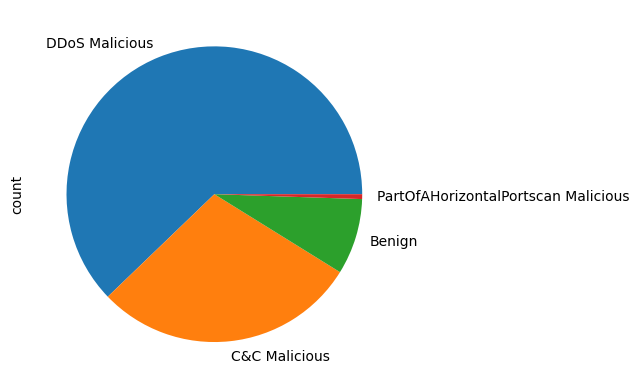

In [88]:
df['label'].value_counts().plot(kind='pie')

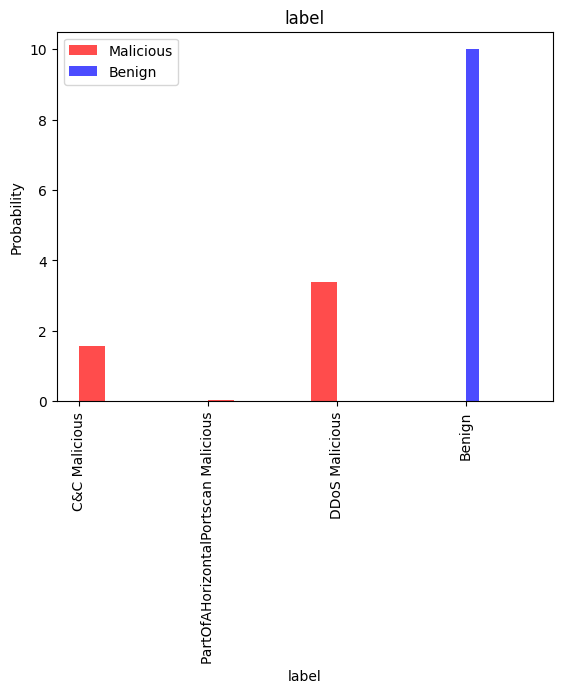

In [36]:
select_columns = [
    'label'
]
for label in select_columns:
    plt.hist(df[df["Type"] == 'Malicious'][label], color='red', label='Malicious', alpha=0.7, density=True)
    plt.hist(df[df["Type"] == 'Benign'][label], color='blue', label='Benign', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.xticks(rotation=90)
    plt.show()

In [38]:
df["Type"] = (df["Type"] == "Malicious").astype(int)

In [39]:
df.head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed_label,Type
0,1.545404e+09,CrDn63WjJEmrWGjqf,192.168.1.195,41040,185.244.25.235,80,tcp,-,3.139211,0,...,0,S,3,180,0,0,- Benign -,Benign,NaN,0
1,1.545404e+09,CY9lJW3gh1Eje4usP6,192.168.1.195,41040,185.244.25.235,80,tcp,-,-,-,...,0,S,1,60,0,0,- Benign -,Benign,NaN,0
2,1.545404e+09,CcFXLynukEDnUlvgl,192.168.1.195,41040,185.244.25.235,80,tcp,-,-,-,...,0,S,1,60,0,0,- Benign -,Benign,NaN,0
3,1.545404e+09,CDrkrSobGYxHhYfth,192.168.1.195,41040,185.244.25.235,80,tcp,http,1.477656,149,...,2896,ShADadttcfF,94,5525,96,139044,- Benign -,Benign,NaN,0
4,1.545404e+09,CTWZQf2oJSvq6zmPAc,192.168.1.195,41042,185.244.25.235,80,tcp,-,3.147116,0,...,0,S,3,180,0,0,- Benign -,Benign,NaN,0


# Split the dataset into Train, Validation, Test sets and apply Scaling

In [40]:
import numpy as np

train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/home/sid/my-jupyter-env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [41]:
def scale_dataset(dataframe, oversample=False):
    # Select only numeric columns
    numeric_df = dataframe.select_dtypes(include=[np.number])
    numeric_df = numeric_df.fillna(0) 
    # Extract features and labels
    X = numeric_df.iloc[:, :-1].values
    y = dataframe.iloc[:, -1].values

    # Standardize the features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Handle oversampling if required
    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)

    # Combine the scaled features and labels back into one dataset
    data = np.hstack((X, np.reshape(y, (-1, 1))))
    return data, X, y

# Split the dataset
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

# Apply scaling
train_data, X_train, y_train = scale_dataset(train, oversample=True)


In [42]:
len(y_train)

25436

In [43]:
sum(y_train == 1)

12718

In [44]:
sum(y_train == 0)

12718

In [45]:
#train_data, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(train, oversample=False)
test, X_test, y_test = scale_dataset(train, oversample=False)

# Implement training for the models

In [46]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [47]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [48]:
y_pred_knn = knn_model.predict(X_test)

In [49]:
print(classification_report(y_test, y_pred_knn))
#joblib.dump(knn_model, 'knn_model.joblib')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1169
           1       1.00      1.00      1.00     12718

    accuracy                           1.00     13887
   macro avg       1.00      1.00      1.00     13887
weighted avg       1.00      1.00      1.00     13887



In [50]:
#NAIVE BAYES MODEL
from sklearn.naive_bayes import GaussianNB

In [51]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

In [52]:
print(classification_report(y_test, y_pred_nb))
#joblib.dump(nb_model, 'nb_model.joblib')

              precision    recall  f1-score   support

           0       0.94      0.85      0.89      1169
           1       0.99      0.99      0.99     12718

    accuracy                           0.98     13887
   macro avg       0.96      0.92      0.94     13887
weighted avg       0.98      0.98      0.98     13887



In [53]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression

In [54]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [55]:
y_pred_lg = lg_model.predict(X_test)
print(classification_report(y_test, y_pred_lg))
#joblib.dump(lg_model, 'lg_model.joblib')

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1169
           1       1.00      0.99      1.00     12718

    accuracy                           0.99     13887
   macro avg       0.97      0.99      0.98     13887
weighted avg       0.99      0.99      0.99     13887



In [56]:
#SVM
from sklearn.svm import SVC

In [57]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [58]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1169
           1       1.00      0.99      1.00     12718

    accuracy                           0.99     13887
   macro avg       0.96      0.99      0.98     13887
weighted avg       0.99      0.99      0.99     13887



# Plot Model Performance

/tmp/ipykernel_52560/3864880431.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(models, rotation=45, ha="right")
/tmp/ipykernel_52560/3864880431.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(models, rotation=45, ha="right")
/tmp/ipykernel_52560/3864880431.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(models, rotation=45, ha="right")


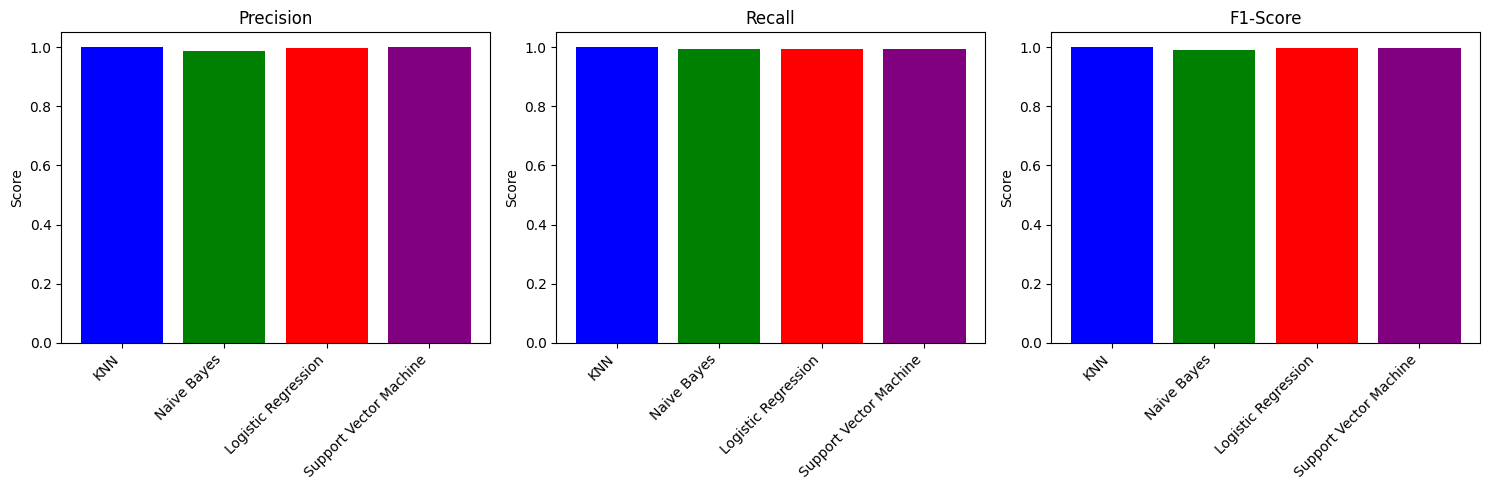

In [59]:
models = ['KNN', 'Naive Bayes', 'Logistic Regression', 'Support Vector Machine']
precisions = [
    precision_score(y_test, y_pred_knn),
    precision_score(y_test, y_pred_nb),
    precision_score(y_test, y_pred_lg),
    precision_score(y_test, y_pred)
]
recalls = [
    recall_score(y_test, y_pred_knn),
    recall_score(y_test, y_pred_nb),
    recall_score(y_test, y_pred_lg),
    recall_score(y_test, y_pred)
]
f1_scores = [
    f1_score(y_test, y_pred_knn),
    f1_score(y_test, y_pred_nb),
    f1_score(y_test, y_pred_lg),
    f1_score(y_test, y_pred)
]

# Plot results
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].bar(models, precisions, color=['blue', 'green', 'red', 'purple'])
ax[0].set_title('Precision')
ax[0].set_ylabel('Score')
ax[0].set_xticklabels(models, rotation=45, ha="right")


ax[1].bar(models, recalls, color=['blue', 'green', 'red', 'purple'])
ax[1].set_title('Recall')
ax[1].set_ylabel('Score')
ax[1].set_xticklabels(models, rotation=45, ha="right")


ax[2].bar(models, f1_scores, color=['blue', 'green', 'red', 'purple'])
ax[2].set_title('F1-Score')
ax[2].set_ylabel('Score')
ax[2].set_xticklabels(models, rotation=45, ha="right")


plt.tight_layout()
plt.show()

# Cross Validation for models

In [56]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
import joblib
import tensorflow as tf
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.base import BaseEstimator, ClassifierMixin
# Define k-fold cross-validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Helper function to evaluate a model using cross-validation
def cross_validate_model(model, X, y, cv):
    acc_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    f1_scores = cross_val_score(model, X, y, cv=cv, scoring='f1')
    return np.mean(acc_scores), np.mean(f1_scores)

# KNN
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_acc, knn_f1 = cross_validate_model(knn_model, X_train, y_train, kf)
print(f"KNN Cross-Validation -> Accuracy: {knn_acc}, F1-Score: {knn_f1}")

# Naive Bayes
nb_model = GaussianNB()
nb_acc, nb_f1 = cross_validate_model(nb_model, X_train, y_train, kf)
print(f"Naive Bayes Cross-Validation -> Accuracy: {nb_acc}, F1-Score: {nb_f1}")

# Logistic Regression
lg_model = LogisticRegression(max_iter=200)
lg_acc, lg_f1 = cross_validate_model(lg_model, X_train, y_train, kf)
print(f"Logistic Regression Cross-Validation -> Accuracy: {lg_acc}, F1-Score: {lg_f1}")

# SVM
svm_model = SVC()
svm_acc, svm_f1 = cross_validate_model(svm_model, X_train, y_train, kf)
print(f"SVM Cross-Validation -> Accuracy: {svm_acc}, F1-Score: {svm_f1}")

# Compare and print the results
print("\nCross-Validation Results:")
print(f"KNN -> Accuracy: {knn_acc}, F1-Score: {knn_f1}")
print(f"Naive Bayes -> Accuracy: {nb_acc}, F1-Score: {nb_f1}")
print(f"Logistic Regression -> Accuracy: {lg_acc}, F1-Score: {lg_f1}")
print(f"SVM -> Accuracy: {svm_acc}, F1-Score: {svm_f1}")
#print(f"Neural Network -> Accuracy: {nn_acc}, F1-Score: {nn_f1}")

KNN Cross-Validation -> Accuracy: 0.9995682118246257, F1-Score: 0.9995696998059351
Naive Bayes Cross-Validation -> Accuracy: 0.9219264045921834, F1-Score: 0.9271863835749323
Logistic Regression Cross-Validation -> Accuracy: 0.9879101544747136, F1-Score: 0.9879783738838321
SVM Cross-Validation -> Accuracy: 0.9935232698046381, F1-Score: 0.9935043306436395

Cross-Validation Results:
KNN -> Accuracy: 0.9995682118246257, F1-Score: 0.9995696998059351
Naive Bayes -> Accuracy: 0.9219264045921834, F1-Score: 0.9271863835749323
Logistic Regression -> Accuracy: 0.9879101544747136, F1-Score: 0.9879783738838321
SVM -> Accuracy: 0.9935232698046381, F1-Score: 0.9935043306436395


# Cross-Validation Results

    KNN (k-Nearest Neighbors)
        Accuracy: 0.9996
        F1-Score: 0.9996

    Naive Bayes
        Accuracy: 0.9219
        F1-Score: 0.9271

    Logistic Regression
        Accuracy: 0.9879
        F1-Score: 0.9879

    Support Vector Machine (SVM)
        Accuracy: 0.9935
        F1-Score: 0.9935

Best Model

    The KNN model has the highest accuracy (0.9996) and F1-Score (0.9996) among all the models, closely followed by the SVM model
    with an accuracy of 0.9935 and F1-Score of 0.9935.

Final Recommendation

    KNN: Given the highest cross-validation performance, the KNN model can be considered the best model in this case. It shows the highest average accuracy and F1-Score, indicating it performs well in both correctly predicting the class labels and balancing precision and recall.

    SVM: The SVM also shows excellent performance, very close to KNN.

Conclusion:

    Based on the cross-validation results, the KNN model is the best-performing model for the dataset.

# Combined data analysis

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [90]:
columns = [
    'ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p', 'proto',
    'service', 'duration', 'orig_bytes', 'resp_bytes', 'conn_state', 'local_orig',
    'local_resp', 'missed_bytes', 'history', 'orig_pkts', 'orig_ip_bytes',
    'resp_pkts', 'resp_ip_bytes', 'tunnel_parents'
]
conn_log_df = pd.read_csv('../conn.log', sep='\t', comment='#', names=columns, header=None, skiprows=8)

In [91]:
conn_log_df.head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents
0,1.499347e+09,Cskb2S1kMTQNkVak85,172.16.0.1,55118,192.168.10.50,80,tcp,-,5.350334,0,...,SF,T,T,0,ShAFf,4,216,2,112,-
1,1.499347e+09,CvJZy546cEBYbG3rc7,172.16.0.1,55132,192.168.10.50,80,tcp,-,5.103996,0,...,SF,T,T,0,ShAFf,4,216,2,112,-
2,1.499347e+09,C5O9SklgPR1A5mUb1,192.168.10.5,50805,52.77.164.13,443,tcp,-,3.000518,0,...,S0,T,F,0,S,2,104,0,0,-
3,1.499347e+09,CN5Szo2vIDyoBK0Wae,172.16.0.1,55158,192.168.10.50,80,tcp,-,5.571069,0,...,SF,T,T,0,ShAFf,4,216,2,112,-
4,1.499347e+09,Cq06uv4L6KQVQhtVh,192.168.10.5,50806,52.77.164.13,443,tcp,-,2.998614,0,...,S0,T,F,0,S,2,104,0,0,-


In [92]:
print(conn_log_df.columns)
print(conn_log_df.shape)

Index(['ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p',
       'proto', 'service', 'duration', 'orig_bytes', 'resp_bytes',
       'conn_state', 'local_orig', 'local_resp', 'missed_bytes', 'history',
       'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes',
       'tunnel_parents'],
      dtype='object')
(422124, 21)


In [93]:
# Define the labeling rules
labeling_rules = [
    {"field": "id.resp_p", "value": 6667, "label": "C&C Malicious"},
    {"field": "id.resp_p", "value": 63798, "label": "PartOfAHorizontalPortscan Malicious"},
    {"field": "id.resp_p", "value": 256, "label": "PartOfAHorizontalPortscan Malicious"},
    {"field": "id.resp_h", "value": "123.59.209.185", "label": "DDoS Malicious"},
    {"field": "id.resp_h", "value": "71.61.66.148", "label": "DDoS Malicious"},
    {"field": "id.resp_h", "value": "74.91.117.248", "label": "DDoS Malicious"},
    {"field": "id.resp_p", "value": 5376, "label": "DDoS Malicious"},
]

# Function to apply labels
def apply_labels(df, rules):
    df["label"] = ""
    for rule in rules:
        field = rule["field"]
        value = rule["value"]
        label = rule["label"]
        df.loc[df[field] == value, "label"] = label
    return df

# Apply the labeling rules to the DataFrame
labeled_conn_log_df = apply_labels(conn_log_df, labeling_rules)

# Display the first few rows of the labeled DataFrame
labeled_conn_log_df.head()
#print(labeled_conn_log_df.shape)
print(labeled_conn_log_df['label'].value_counts())

label
                                       400642
DDoS Malicious                          14396
C&C Malicious                            6883
PartOfAHorizontalPortscan Malicious       203
Name: count, dtype: int64


In [94]:
def assign_type(label):
    if 'Malicious' in label:
        return 'Malicious'
    else:
        return 'Benign'

labeled_conn_log_df['Type'] = labeled_conn_log_df['label'].apply(assign_type)
labeled_conn_log_df.to_csv('combined_log.csv', index=False)

In [95]:
df = pd.read_csv('combined_log.csv', low_memory=False)

In [96]:
print(df['Type'].value_counts())

Type
Benign       400642
Malicious     21482
Name: count, dtype: int64


# Pie chart for combined dataset composition

<Axes: ylabel='count'>

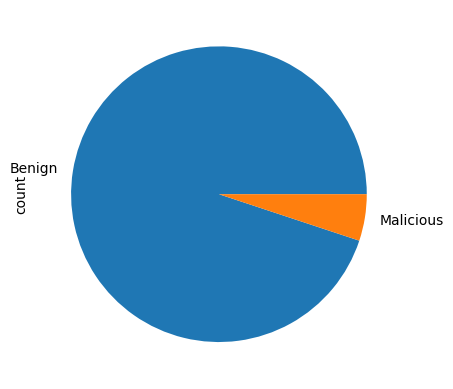

In [98]:
df['Type'].value_counts().plot(kind='pie')

In [70]:
df['Type'] = (df['Type'] == 'Malicious').astype(int)

In [71]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report

In [72]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

def scale_dataset(dataframe, oversample=False):
    # Select only numeric columns
    numeric_df = dataframe.select_dtypes(include=[np.number])
    numeric_df = numeric_df.fillna(0) 
    # Extract features and labels
    X = numeric_df.iloc[:, :-1].values
    y = dataframe.iloc[:, -1].values

    # Standardize the features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Handle oversampling if required
    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)

    # Combine the scaled features and labels back into one dataset
    data = np.hstack((X, np.reshape(y, (-1, 1))))
    return data, X, y

# Split the dataset
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

# Apply scaling
train_data, X_train, y_train = scale_dataset(train, oversample=True)

/home/sid/my-jupyter-env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [73]:
len(y_train)

480656

In [74]:
sum(y_train == 1)

240328

In [75]:
sum(y_train == 0)

240328

# Which model to choose ?

    Cross Validation Results for non-combined data analysis models:

    KNN (k-Nearest Neighbors)
        Accuracy: 0.9996
        F1-Score: 0.9996
    Naive Bayes
        Accuracy: 0.92
        F1-Score: 0.92
    Logistic Regression
        Accuracy: 0.98
        F1-Score: 0.98
    Support Vector Machine (SVM)
        Accuracy: 0.9935
        F1-Score: 0.9935

Based on the Cross Validation results of the models for the non-combined dataset, We choose to use KNN as the machine learning models for the combined dataset.


In [76]:
#train_data, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(train, oversample=False)
test, X_test, y_test = scale_dataset(train, oversample=False)

In [77]:
import joblib
knn_model = joblib.load('../knn_model.joblib')
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [78]:
y_pred_knn = knn_model.predict(X_test)

In [79]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    240328
           1       0.99      1.00      0.99     12946

    accuracy                           1.00    253274
   macro avg       0.99      1.00      1.00    253274
weighted avg       1.00      1.00      1.00    253274



# KNN performance for combined dataset

/tmp/ipykernel_52560/1229905203.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(models, rotation=45, ha="right")
/tmp/ipykernel_52560/1229905203.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(models, rotation=45, ha="right")
/tmp/ipykernel_52560/1229905203.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(models, rotation=45, ha="right")


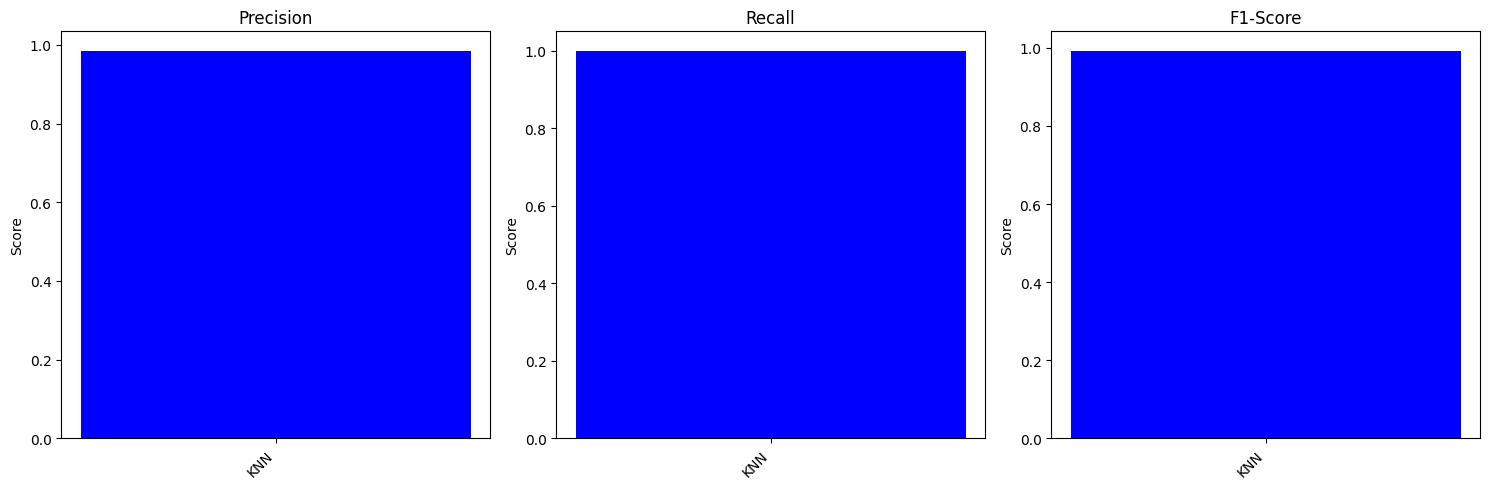

In [80]:
models = ['KNN']
precisions = [
    precision_score(y_test, y_pred_knn)
]
recalls = [
    recall_score(y_test, y_pred_knn)
]
f1_scores = [
    f1_score(y_test, y_pred_knn)
]

# Plot results
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].bar(models, precisions, color=['blue'])
ax[0].set_title('Precision')
ax[0].set_ylabel('Score')
ax[0].set_xticklabels(models, rotation=45, ha="right")


ax[1].bar(models, recalls, color=['blue'])
ax[1].set_title('Recall')
ax[1].set_ylabel('Score')
ax[1].set_xticklabels(models, rotation=45, ha="right")


ax[2].bar(models, f1_scores, color=['blue'])
ax[2].set_title('F1-Score')
ax[2].set_ylabel('Score')
ax[2].set_xticklabels(models, rotation=45, ha="right")


plt.tight_layout()
plt.show()

# Result and Conclusion
As per the classification report:

                  precision    recall  f1-score   support

               0       1.00      1.00      1.00    240328
               1       0.99      1.00      0.99     12946

        accuracy                           1.00    253274
       macro avg       0.99      1.00      1.00    253274
    weighted avg       1.00      1.00      1.00    253274

    KNN is able to classify benign and Malicious traffic with an accuracy of 100% which demonstrates perfect analysis done by the machine learning model.